In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("/Users/pookie/Downloads/updated_dataset.csv")
data[:10]

,Cohesion (kPa),Angle of Friction (degrees),Unit Weight (kN/m³),Factor of Safety (FOS),Slope Angle (degrees),Height (m),Saturation (%),Wind Velocity (m/s),Rain Intensity (m/s),Blast Vibrations (mm/s),Cloudburst Indicator,Depth to Water Table (m)
0,12,15,19,2.33,23.52,17.14,25.68,42.03,0.233,0.071,0,0.1520
1,11,17,17,2.17,21.47,15.14,24.93,36.75,0.264,0.066,0,0.1650
2,11,17,21,1.37,20.06,15.18,24.96,37.50,0.263,0.087,0,0.1750
3,11,15,18,2.58,24.54,16.60,24.95,34.43,0.260,0.091,0,0.1755
4,12,18,20,1.11,24.56,16.35,24.95,34.05,0.282,0.073,0,0.1775
5,10,21,19,0.07,24.22,17.94,26.21,34.14,0.299,0.068,0,0.1835
6,11,26,19,0.21,24.65,16.37,25.29,32.67,0.329,0.040,0,0.1845
7,13,18,20,3.93,23.76,15.16,28.73,41.17,0.276,0.095,0,0.1855
8,12,20,18,3.54,24.86,17.24,25.35,38.14,0.290,0.086,0,0.1880
9,11,29,18,3.07,20.50,15.03,25.77,41.57,0.325,0.052,0,0.1885


**Exploring the dataset**

In [3]:
#we are tring to find some basic info from the dataset
print("Dataset Info:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cohesion (kPa)               71999 non-null  int64  
 1   Angle of Friction (degrees)  71999 non-null  int64  
 2   Unit Weight (kN/m³)          71999 non-null  int64  
 3   Factor of Safety (FOS)       71999 non-null  float64
 4   Slope Angle (degrees)        71999 non-null  float64
 5   Height (m)                   71999 non-null  float64
 6   Saturation (%)               71999 non-null  float64
 7   Wind Velocity (m/s)          71999 non-null  float64
 8   Rain Intensity (m/s)         71999 non-null  float64
 9   Blast Vibrations (mm/s)      71999 non-null  float64
 10  Cloudburst Indicator         71999 non-null  int64  
 11  Depth to Water Table (m)     71999 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 6.6 MB

Summary Stati

In [4]:
#checking if there is any NA values in the dataset
data.isnull().sum()

Cohesion (kPa)                 0
Angle of Friction (degrees)    0
Unit Weight (kN/m³)            0
Factor of Safety (FOS)         0
Slope Angle (degrees)          0
Height (m)                     0
Saturation (%)                 0
Wind Velocity (m/s)            0
Rain Intensity (m/s)           0
Blast Vibrations (mm/s)        0
Cloudburst Indicator           0
Depth to Water Table (m)       0
dtype: int64

**As no null values have been discovered we will move forward to data exploration then to scaling and creating the model**

**for a better box plot what we can do it we are defining three classes of FOS**


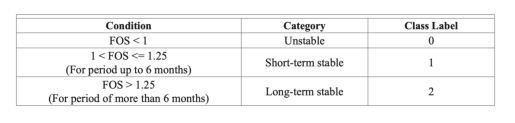

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Users/pookie/Desktop/FOS.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

In [6]:
df_FOS= data['Factor of Safety (FOS)']
df_FOS = np.where(df_FOS < 1, 0, df_FOS)
df_FOS = np.where((df_FOS <= 1.25) & (df_FOS > 1), 1, df_FOS)
df_FOS = np.where(df_FOS > 1.25, 2, df_FOS)
df_FOS[0:10]

array([2., 2., 2., 2., 1., 0., 0., 2., 2., 2.])

In [7]:
columns_to_make = ['Cohesion (kPa)','Angle of Friction (degrees)','Unit Weight (kN/m³)','Slope Angle (degrees)','Height (m)','Saturation (%)','Wind Velocity (m/s)',
                   'Rain Intensity (m/s)','Blast Vibrations (mm/s)','Depth to Water Table (m)']

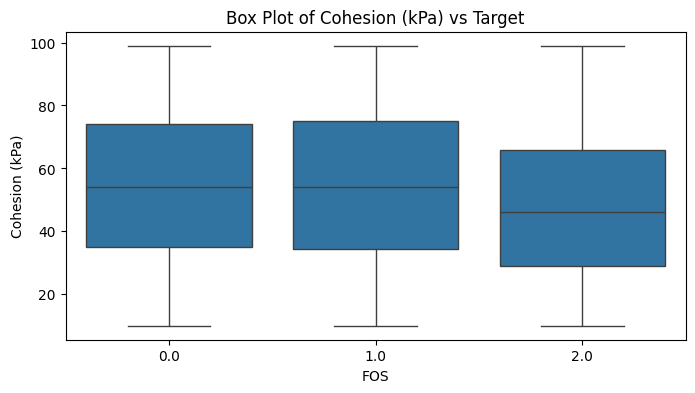

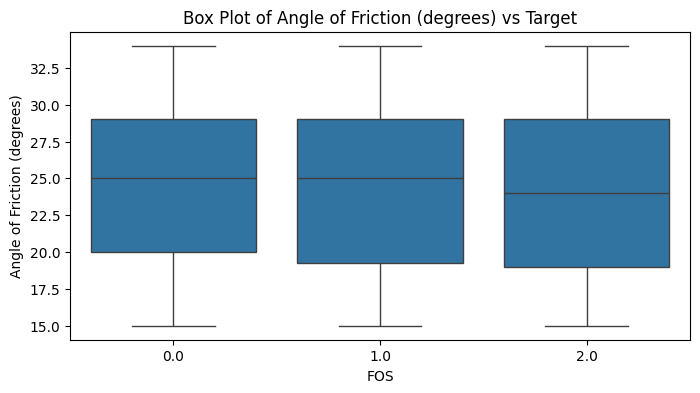

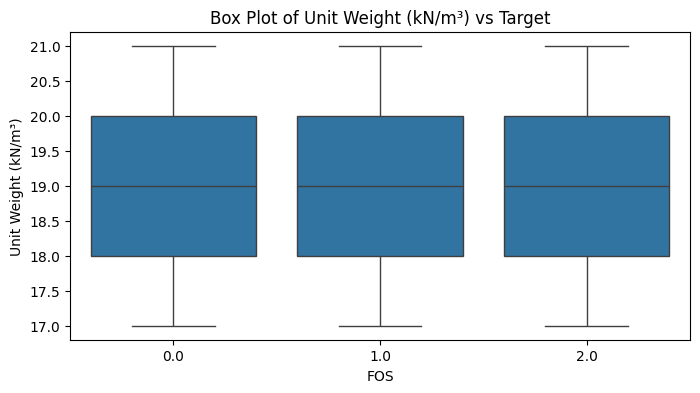

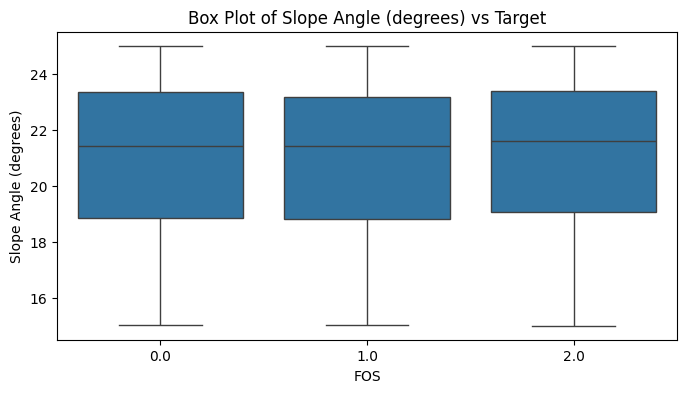

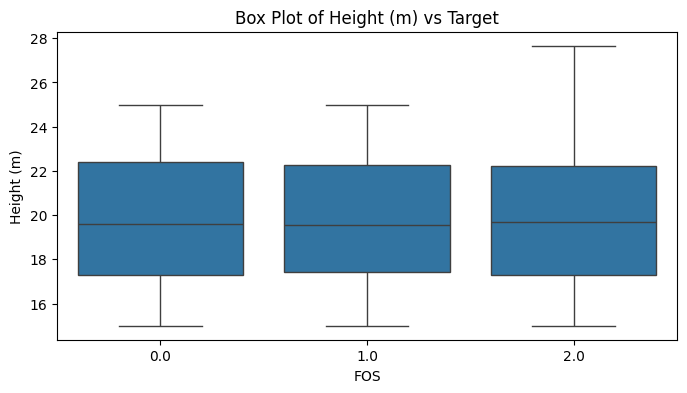

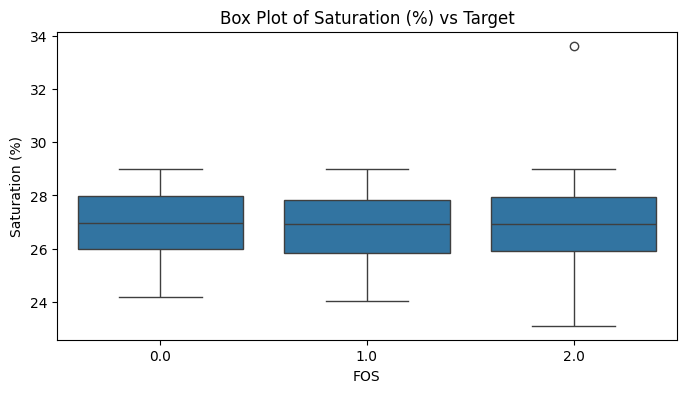

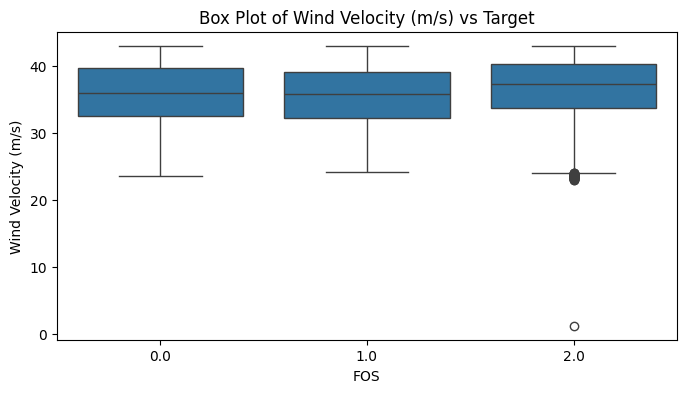

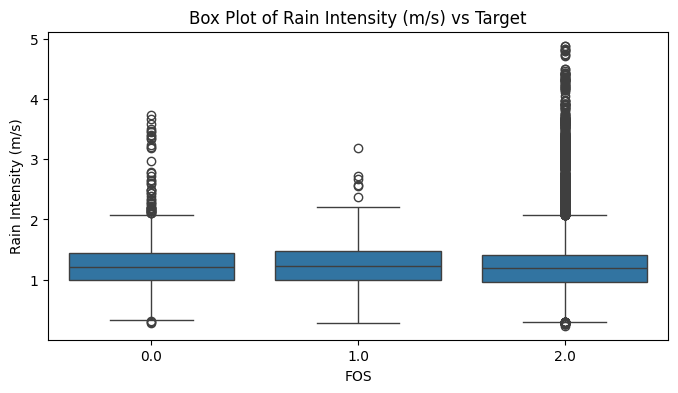

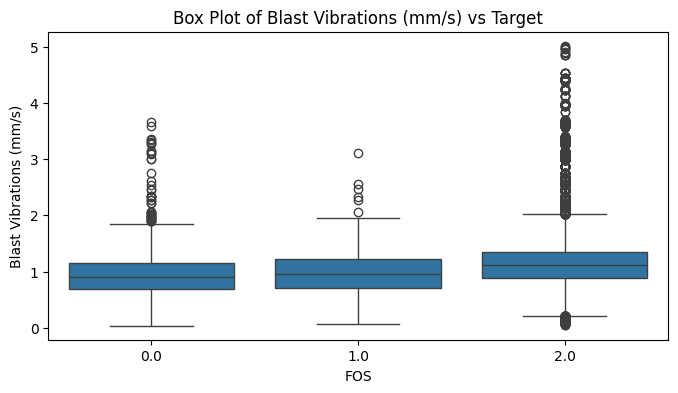

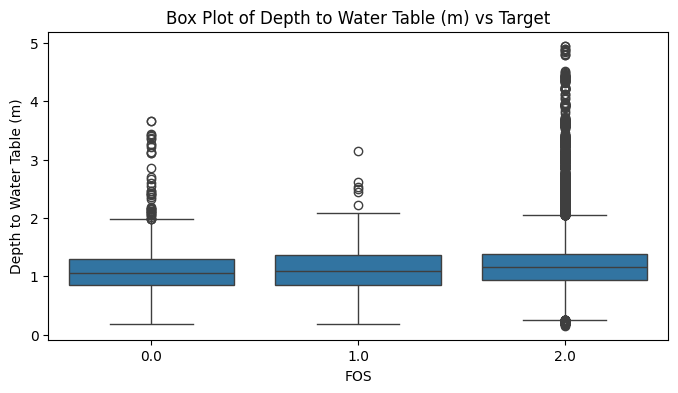

In [8]:
for column in columns_to_make:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_FOS, y=data[column])
    plt.title(f"Box Plot of {column} vs Target")
    plt.xlabel("FOS")
    plt.ylabel(column)
    plt.show()

**Here we can see some outliers in some above box plots**

In [10]:
#Now we are adressing those columns to remove these outliers
column_with_outlier = ['Depth to Water Table (m)','Wind Velocity (m/s)','Rain Intensity (m/s)','Blast Vibrations (mm/s)']
for column in column_with_outlier:
    data_column = data[column]
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    IQR = Q3 - Q1 #using the difference in the quartile approach to remove outliers in the data 
    
    lower_bound = Q1 - 1.5 * IQR #finding the boundary of the filtered data so that we can keep it ans remove rest of them
    upper_bound = Q3 + 1.5 * IQR
    
    #Filtering the data
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    data_filtered
data_filtered.head()

,Cohesion (kPa),Angle of Friction (degrees),Unit Weight (kN/m³),Factor of Safety (FOS),Slope Angle (degrees),Height (m),Saturation (%),Wind Velocity (m/s),Rain Intensity (m/s),Blast Vibrations (mm/s),Cloudburst Indicator,Depth to Water Table (m)
89,11,15,19,27.53,24.78,15.88,25.45,42.99,0.262,0.230,0,0.2460
105,11,15,21,11.05,23.15,18.56,25.27,38.14,0.286,0.230,0,0.2580
111,10,21,19,12.66,24.09,17.57,28.51,42.12,0.310,0.208,0,0.2590
138,11,20,21,8.79,19.77,17.77,25.04,39.24,0.335,0.205,0,0.2700
142,11,15,20,17.70,20.93,15.84,27.37,41.76,0.291,0.252,0,0.2715


**We will again try to make the box plot to check if the outliers have been removed**

In [11]:
#Now we can see some of the rows have been eliminated then now we have to extract FOS from this one
df_FOS_new = data_filtered['Factor of Safety (FOS)']
df_FOS_new.head()
df_FOS_new.shape #It can be seen that the shape has been matched with the no of rows with the columns we have to check
df_FOS_new = np.where(df_FOS_new < 1, 0, df_FOS_new)
df_FOS_new = np.where((df_FOS_new <= 1.25) & (df_FOS_new > 1), 1, df_FOS_new)
df_FOS_new = np.where(df_FOS_new > 1.25, 2, df_FOS_new)

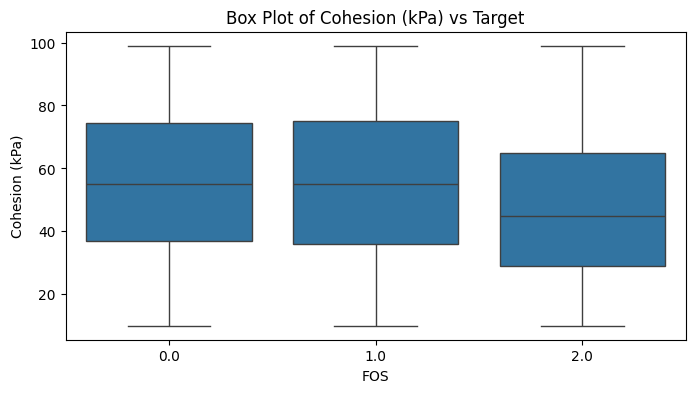

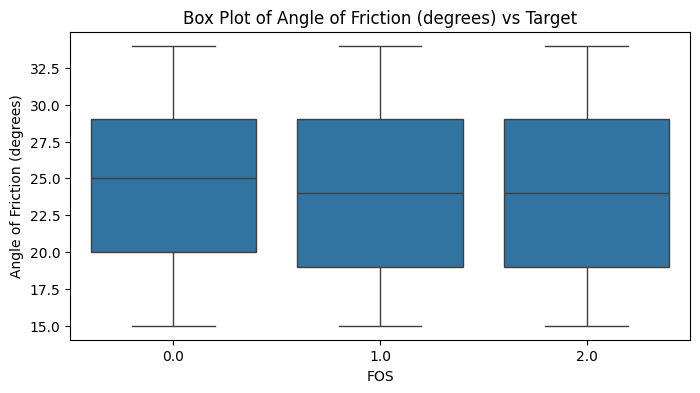

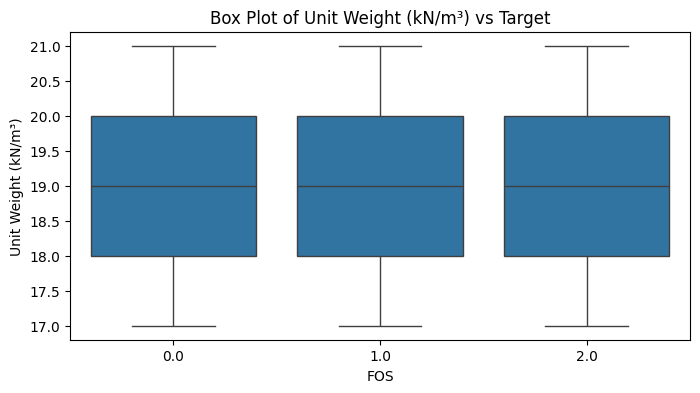

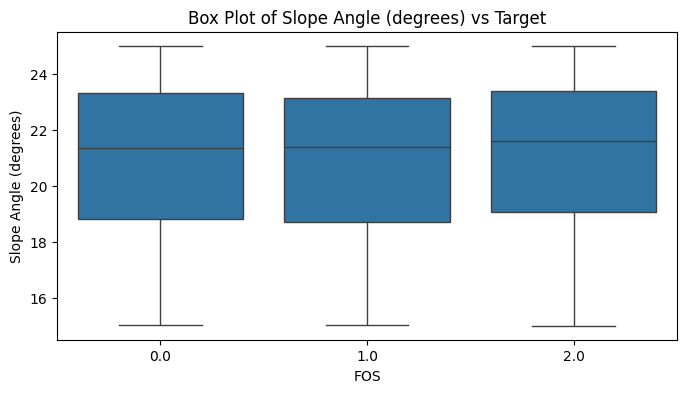

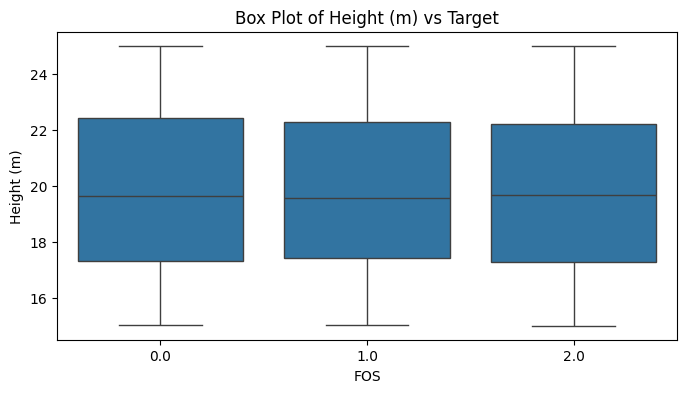

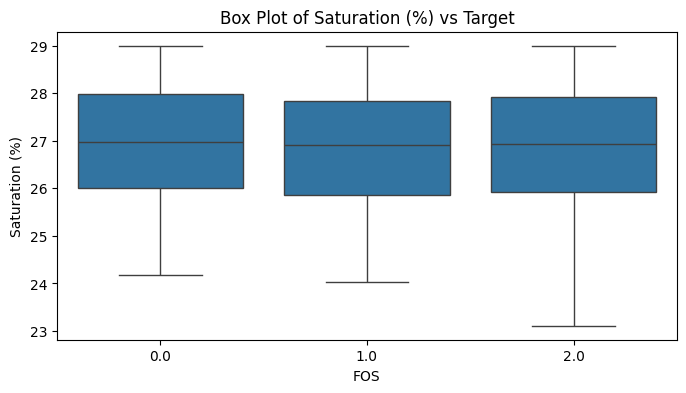

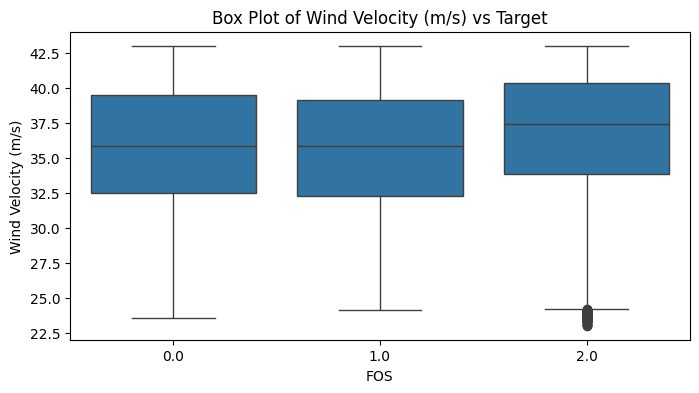

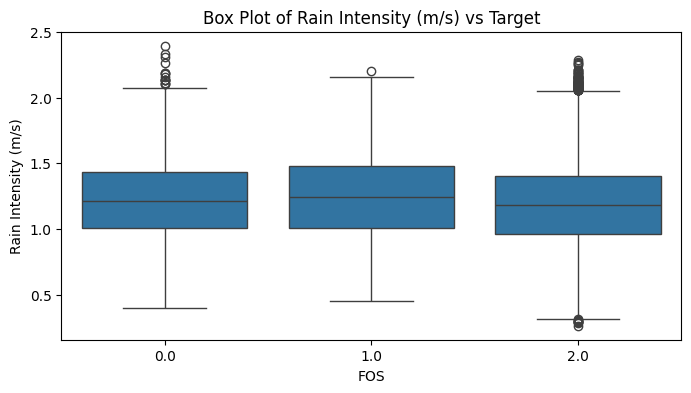

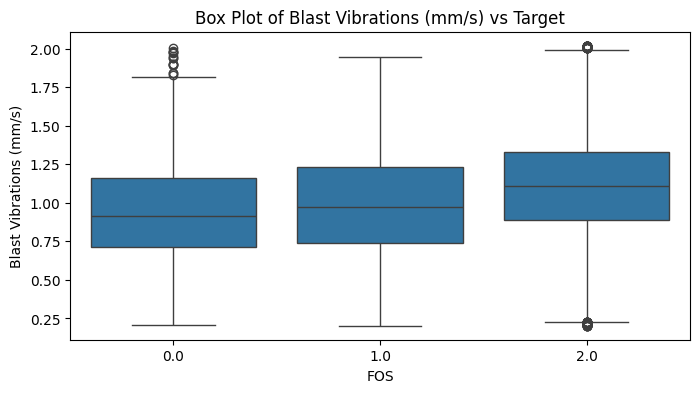

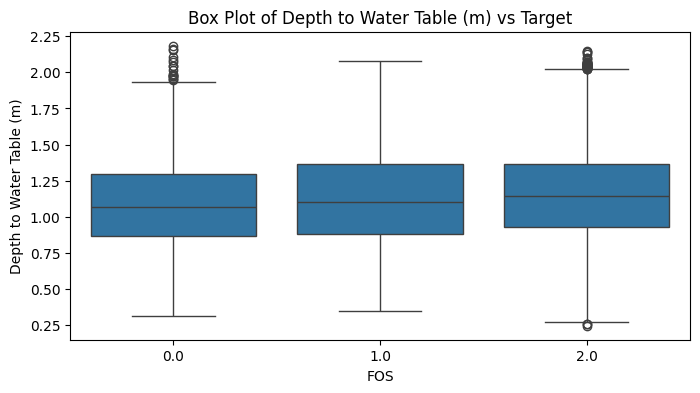

In [12]:
columns_to_make = ['Cohesion (kPa)','Angle of Friction (degrees)','Unit Weight (kN/m³)','Slope Angle (degrees)','Height (m)','Saturation (%)','Wind Velocity (m/s)',
                   'Rain Intensity (m/s)','Blast Vibrations (mm/s)','Depth to Water Table (m)']
for column in columns_to_make:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_FOS_new, y=data_filtered[column])
    plt.title(f"Box Plot of {column} vs Target")
    plt.xlabel("FOS")
    plt.ylabel(column)
    plt.show()

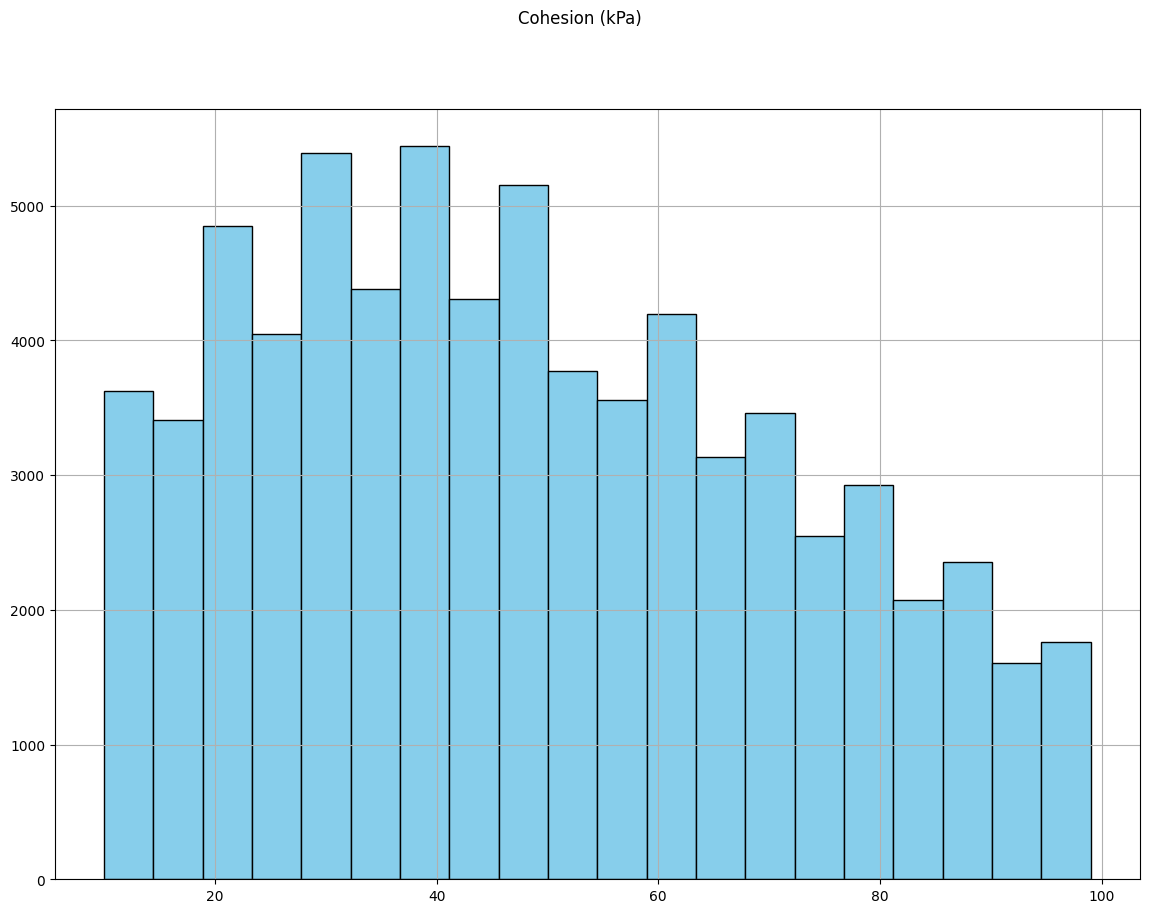

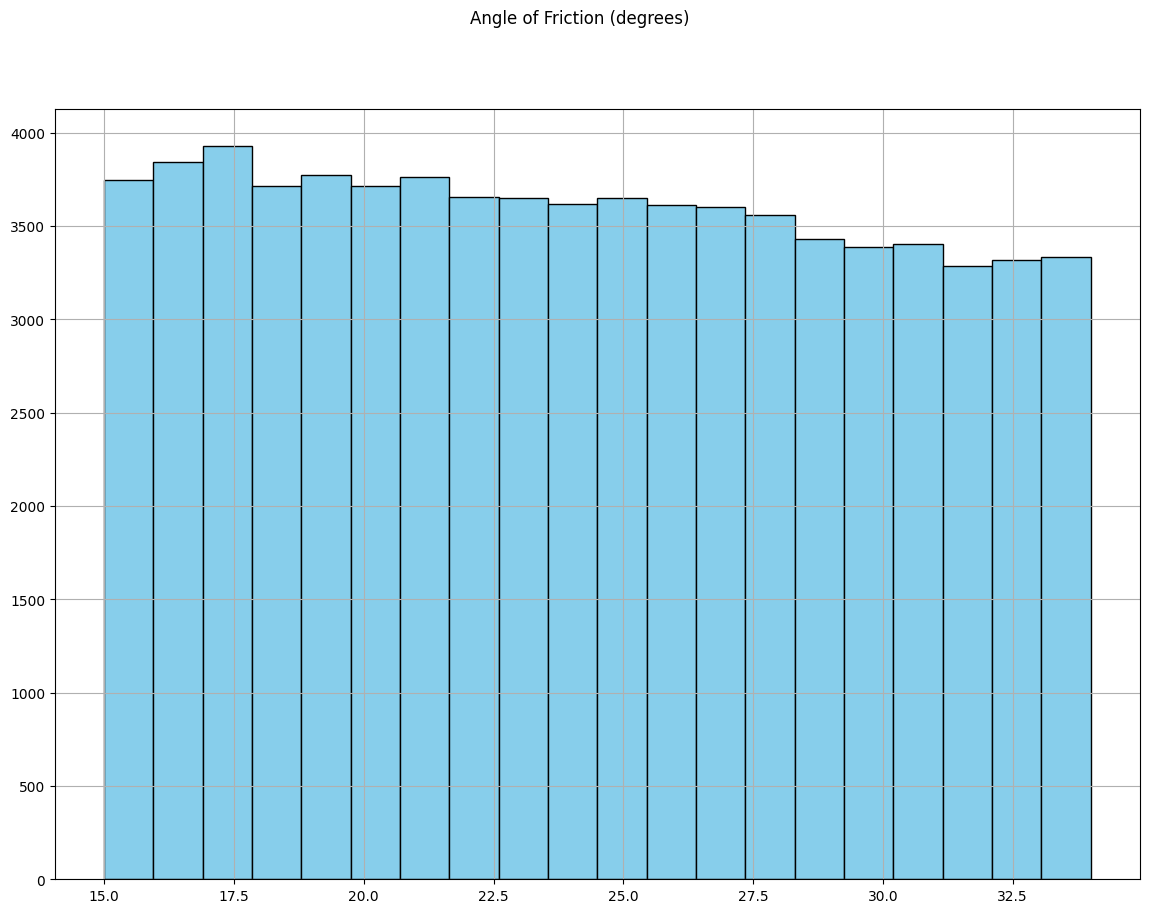

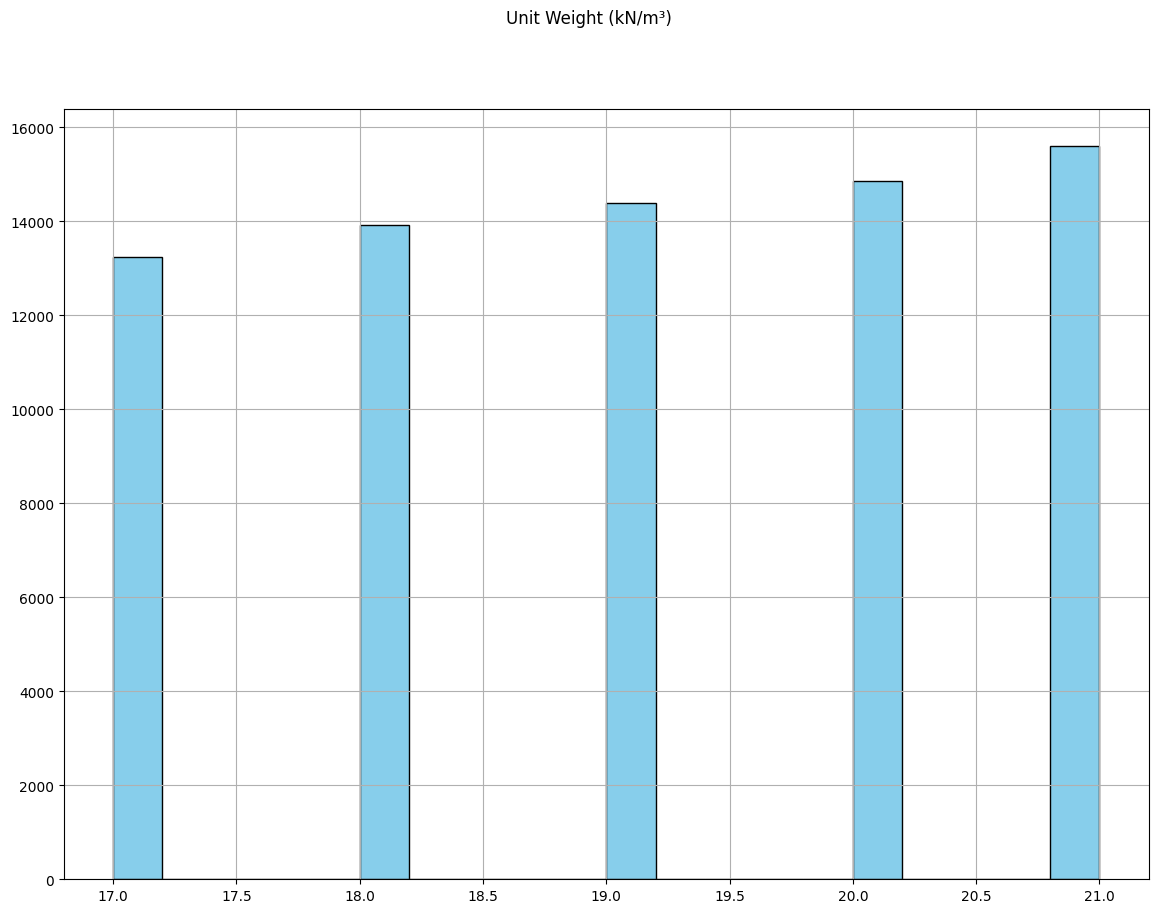

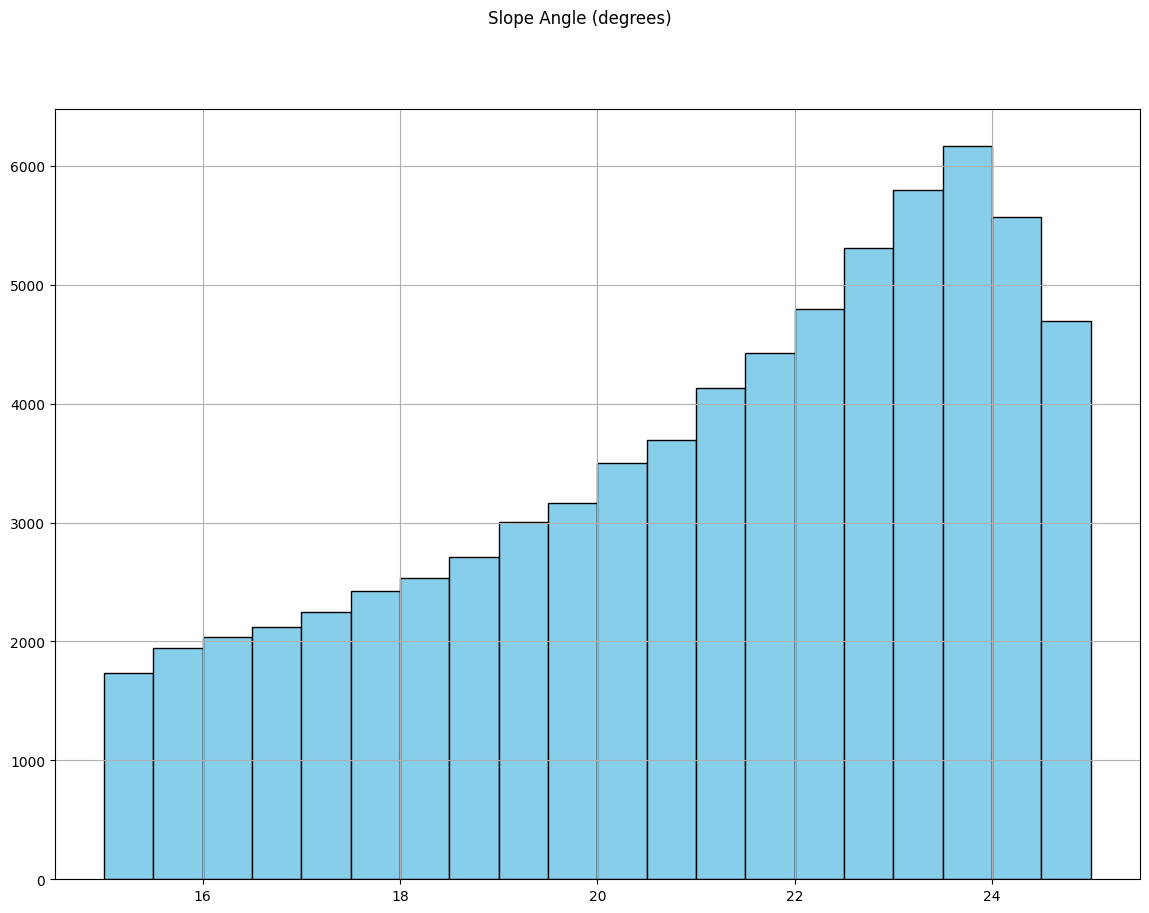

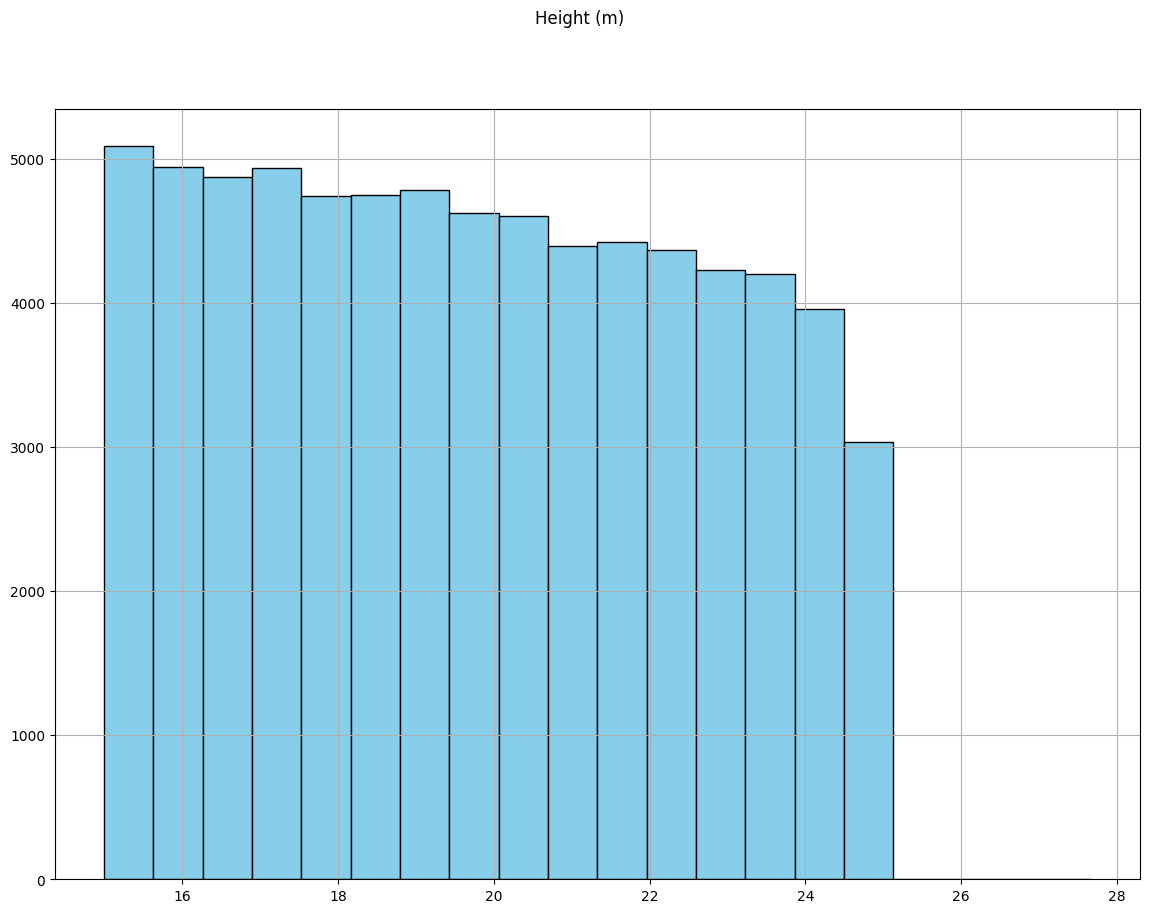

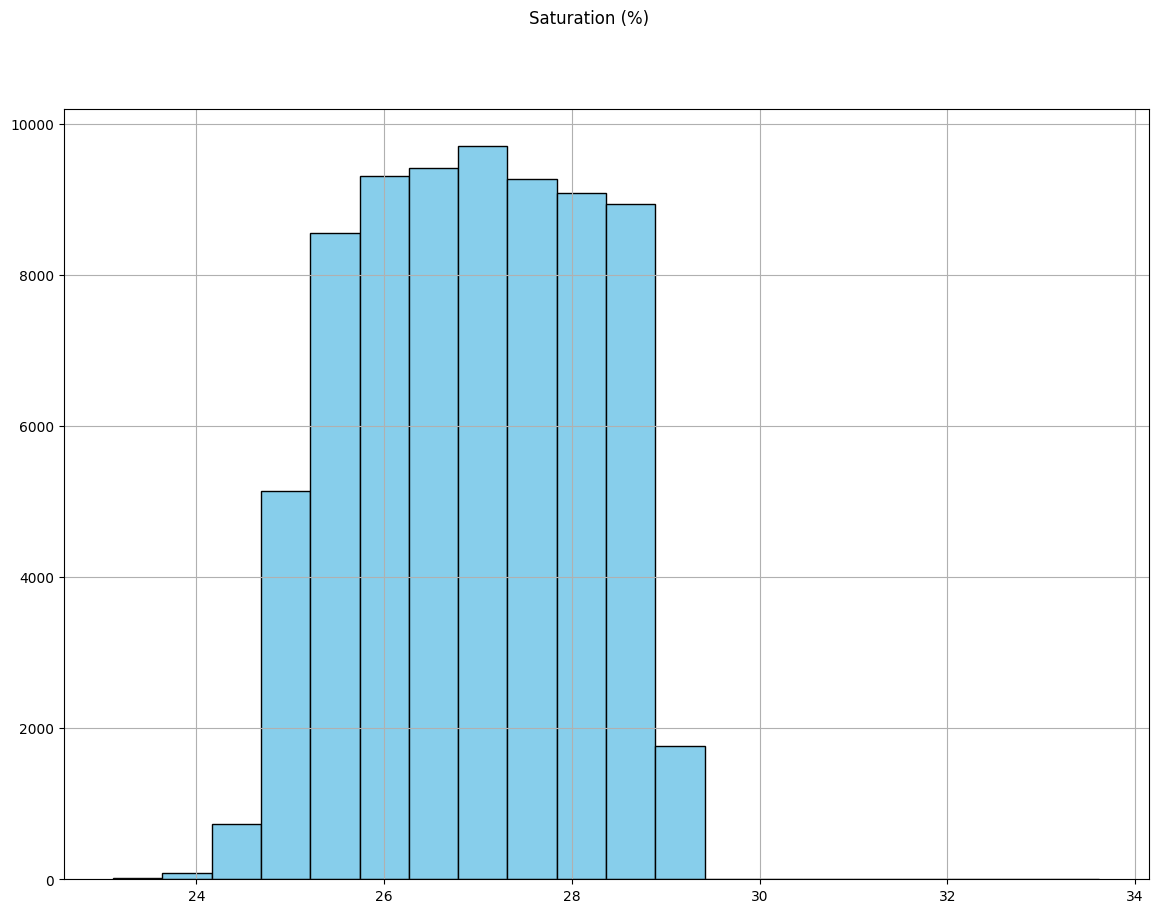

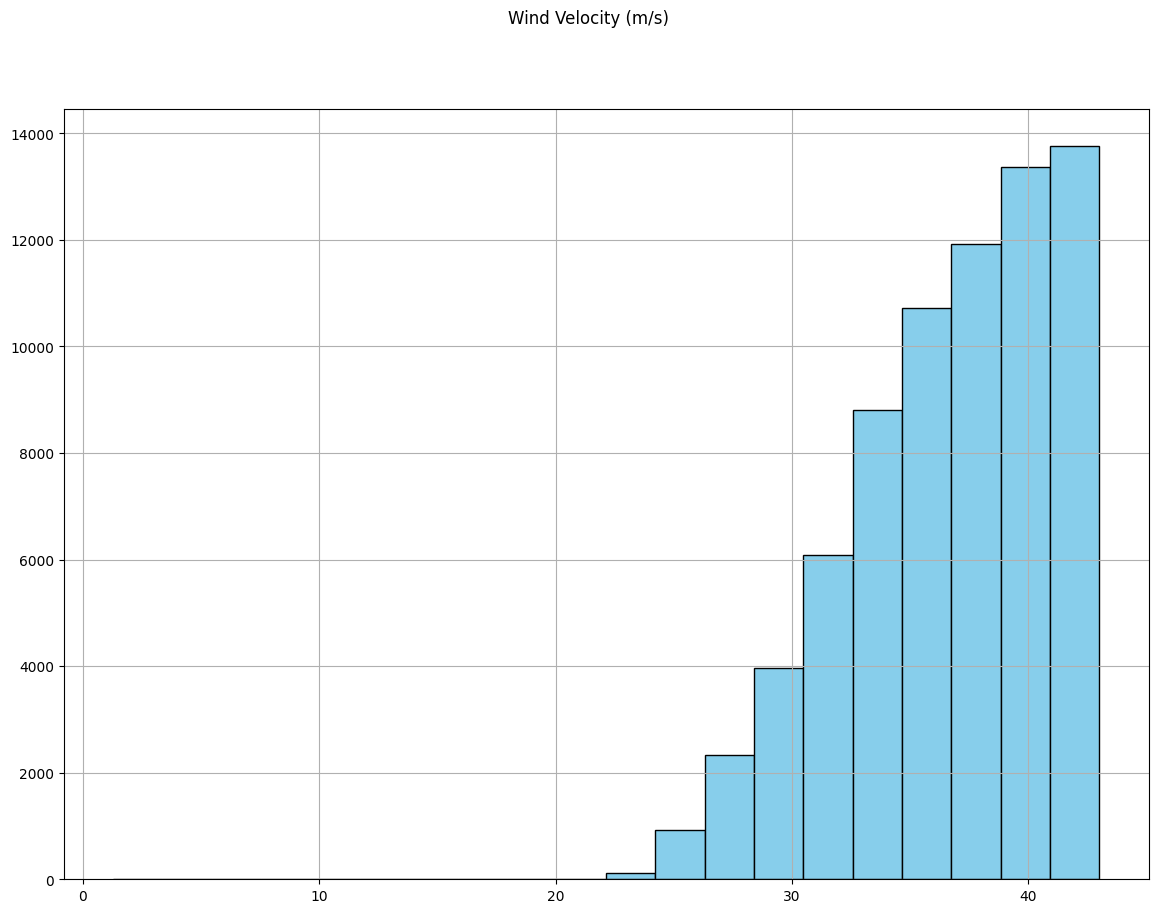

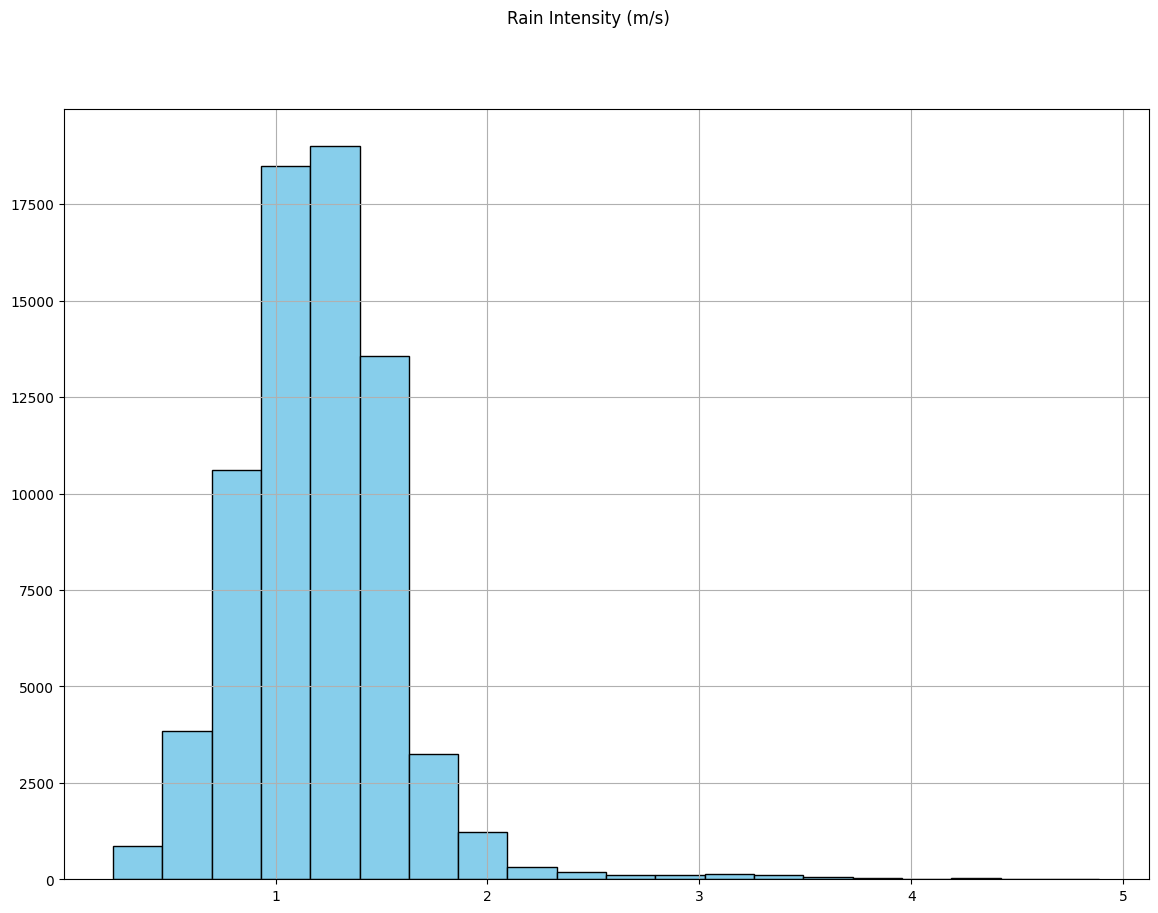

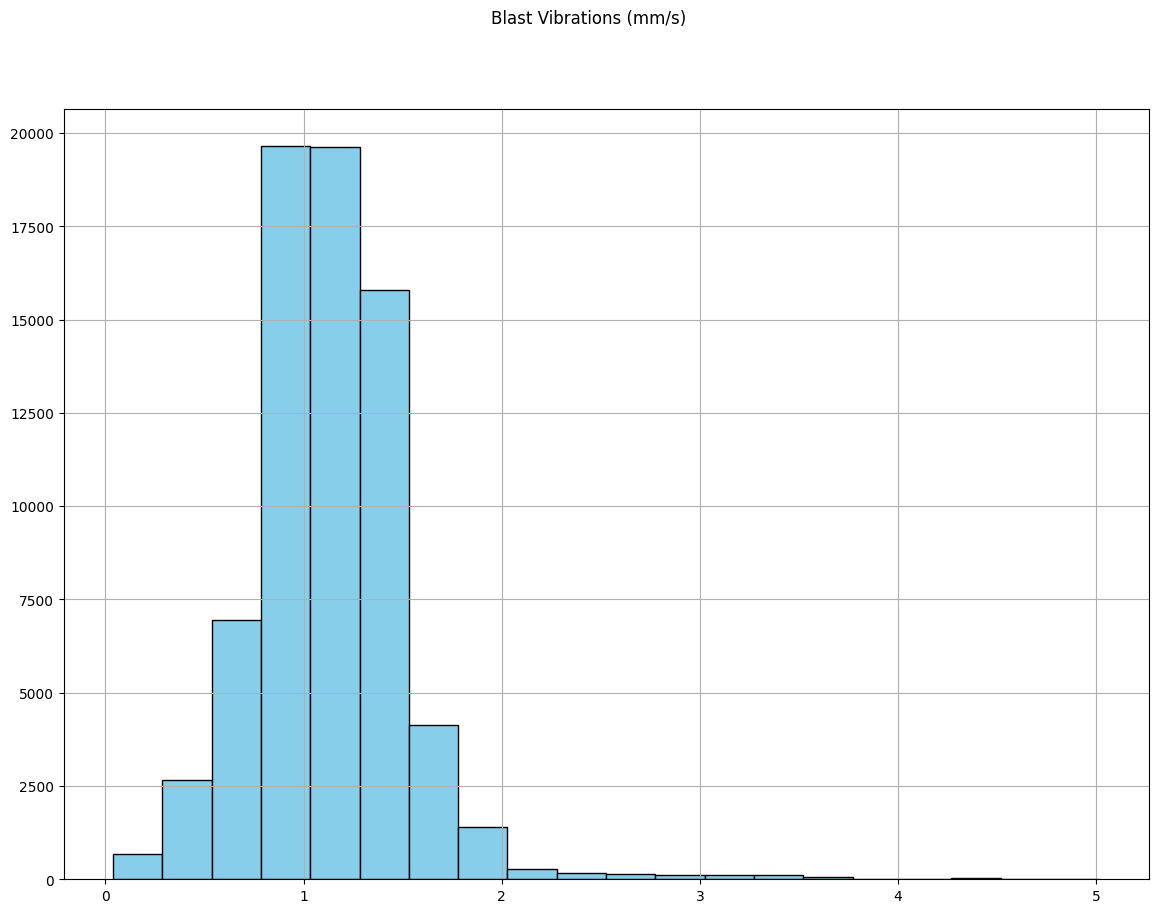

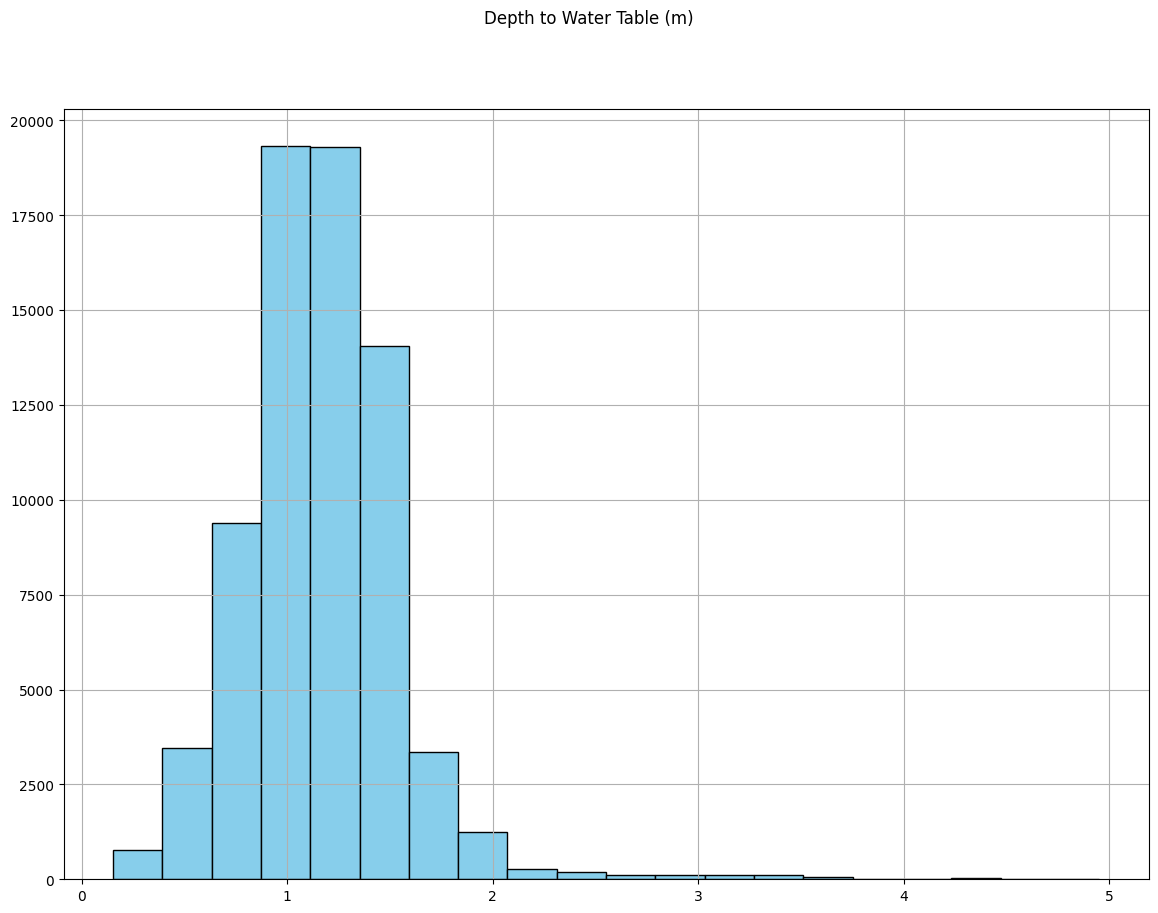

In [13]:
#We will be making Histogram for every feature
for column in columns_to_make:
    data[column].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
    plt.suptitle(f'{column}')
    plt.show()

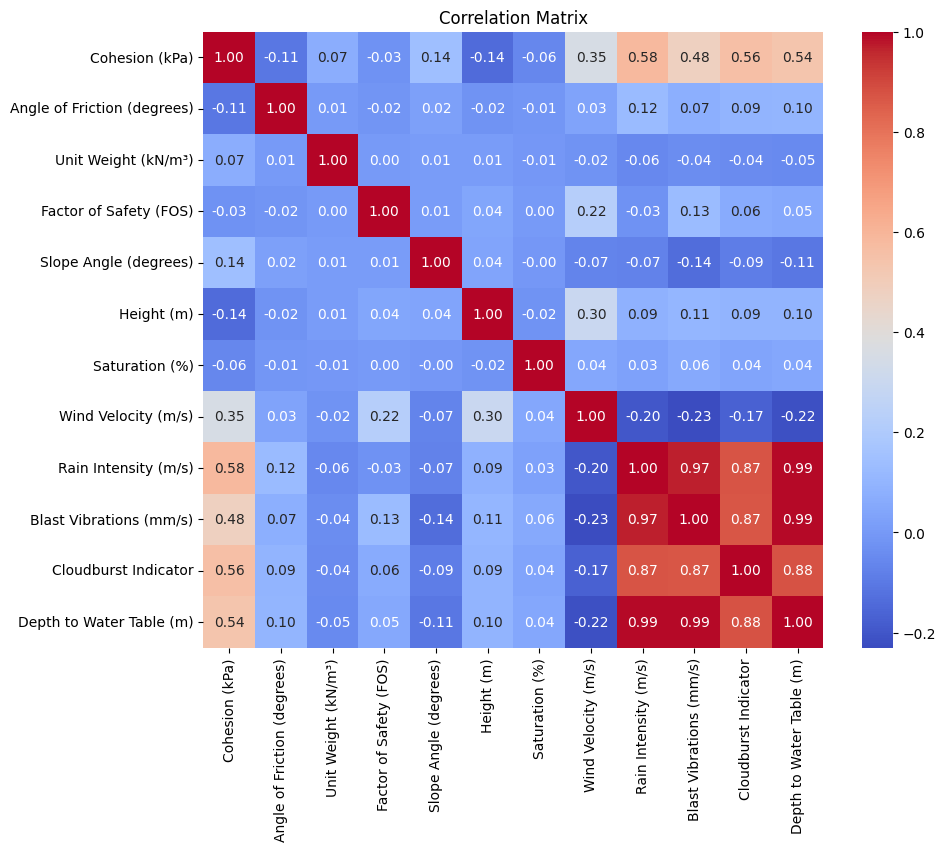

In [25]:
#Plotting a co-relation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [68]:
#Preparing the independent and dependent variables
X = data_filtered.drop('Factor of Safety (FOS)', axis=1)  #dropping FOS from the datset as we have to predict the stability using the value of FOS.
y = data_filtered[['Factor of Safety (FOS)']] #changing FOS column into another dataframe

In [69]:
#normalising the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.616262,-1.603864,-0.059339,1.370209,-1.361856,-1.233336,1.459484,-3.002710,-2.770827,-1.554079,-2.919459
1,-1.616262,-1.603864,1.356926,0.768210,-0.425550,-1.384092,0.327071,-2.924383,-2.770827,-1.554079,-2.880381
2,-1.659789,-0.558169,-0.059339,1.115375,-0.771424,1.329514,1.256350,-2.846057,-2.840656,-1.554079,-2.877125
3,-1.616262,-0.732451,1.356926,-0.480106,-0.701551,-1.576724,0.583907,-2.764466,-2.850178,-1.554079,-2.841304
4,-1.616262,-1.603864,0.648793,-0.051690,-1.375831,0.374726,1.172294,-2.908065,-2.700998,-1.554079,-2.836419


**We will check the balance in the dataset**

In [70]:
#The dataset before using SMOTE
print("\nClass Distribution Before SMOTE:\n", y.value_counts())


Class Distribution Before SMOTE:
 Factor of Safety (FOS)
17.37                     34
24.01                     34
25.62                     34
29.18                     33
1.82                      33
                          ..
42.12                      1
42.16                      1
42.17                      1
40.08                      1
42.96                      1
Name: count, Length: 4237, dtype: int64


**There is a clearly an imabalance in the dataset which needs to be adressed using SMOTE**

In [71]:
#Applying SMOTE
threshold = 1
y = np.where(y > threshold, 1, 0)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=49)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)
X_resampled.head()
y_resampled

array([1, 1, 1, ..., 0, 0, 0])

In [73]:
# Display class distribution after SMOTE
print("\nClass Distribution After SMOTE:\n", pd.Series(y_resampled).value_counts())


Class Distribution After SMOTE:
 1    68584
0    68584
Name: count, dtype: int64


In [74]:
#Using Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
X_train_nosmote, X_test_nosmote, y_train_nosmote, y_test_nosmote = train_test_split(X_scaled_df, y, test_size=0.25, random_state=42)

In [75]:
#we also want to compare before and after using the smote so we will make model on both the dataset
models = {
    'Random Forest': RandomForestClassifier(random_state=50),
    'SVM': SVC(random_state=51),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=52, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=53),
    'Naive Bayes': GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train_nosmote, y_train_nosmote)
    y_pred = model.predict(X_test_nosmote)
    print(f"\n{name} Classification Report:\n", classification_report(y_test_nosmote, y_pred))
    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test_nosmote, y_pred))
    results[name] = {
        'model': model,
        'classification_report': classification_report(y_test_nosmote, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test_nosmote, y_pred)
    }

/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.04      0.08       481
           1       0.97      1.00      0.99     17154

    accuracy                           0.97     17635
   macro avg       0.84      0.52      0.53     17635
weighted avg       0.97      0.97      0.96     17635


Random Forest Confusion Matrix:
 [[   21   460]
 [    9 17145]]


/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07       481
           1       0.97      1.00      0.99     17154

    accuracy                           0.97     17635
   macro avg       0.99      0.52      0.53     17635
weighted avg       0.97      0.97      0.96     17635


SVM Confusion Matrix:
 [[   18   463]
 [    0 17154]]


/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNN Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.01      0.03       481
           1       0.97      1.00      0.99     17154

    accuracy                           0.97     17635
   macro avg       0.69      0.51      0.51     17635
weighted avg       0.96      0.97      0.96     17635


KNN Confusion Matrix:
 [[    7   474]
 [   10 17144]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.37      0.48       481
           1       0.98      1.00      0.99     17154

    accuracy                           0.98     17635
   macro avg       0.84      0.68      0.74     17635
weighted avg       0.97      0.98      0.98     17635


Logistic Regression Confusion Matrix:
 [[  176   305]
 [   73 17081]]


/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.29      0.28       481
           1       0.98      0.98      0.98     17154

    accuracy                           0.96     17635
   macro avg       0.63      0.63      0.63     17635
weighted avg       0.96      0.96      0.96     17635


Decision Tree Confusion Matrix:
 [[  138   343]
 [  361 16793]]

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       481
           1       0.97      1.00      0.99     17154

    accuracy                           0.97     17635
   macro avg       0.49      0.50      0.49     17635
weighted avg       0.95      0.97      0.96     17635


Naive Bayes Confusion Matrix:
 [[    0   481]
 [    0 17154]]


/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pookie/Desktop/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pookie/Desktop/venv/lib/python3.13/site-packages

In [76]:
# Step 4: Model Training and Evaluation
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    results[name] = {
        'model': model,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     17069
           1       1.00      0.97      0.98     17223

    accuracy                           0.98     34292
   macro avg       0.99      0.99      0.98     34292
weighted avg       0.99      0.98      0.98     34292


Random Forest Confusion Matrix:
 [[17042    27]
 [  488 16735]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     17069
           1       1.00      0.96      0.98     17223

    accuracy                           0.98     34292
   macro avg       0.98      0.98      0.98     34292
weighted avg       0.98      0.98      0.98     34292


SVM Confusion Matrix:
 [[17069     0]
 [  647 16576]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     17069
           1       1

In [77]:
# Step 5: Feature Importance Analysis (Using Random Forest)
rf_model = results['Random Forest']['model']
feature_importances = rf_model.feature_importances_
feature_names = X.columns

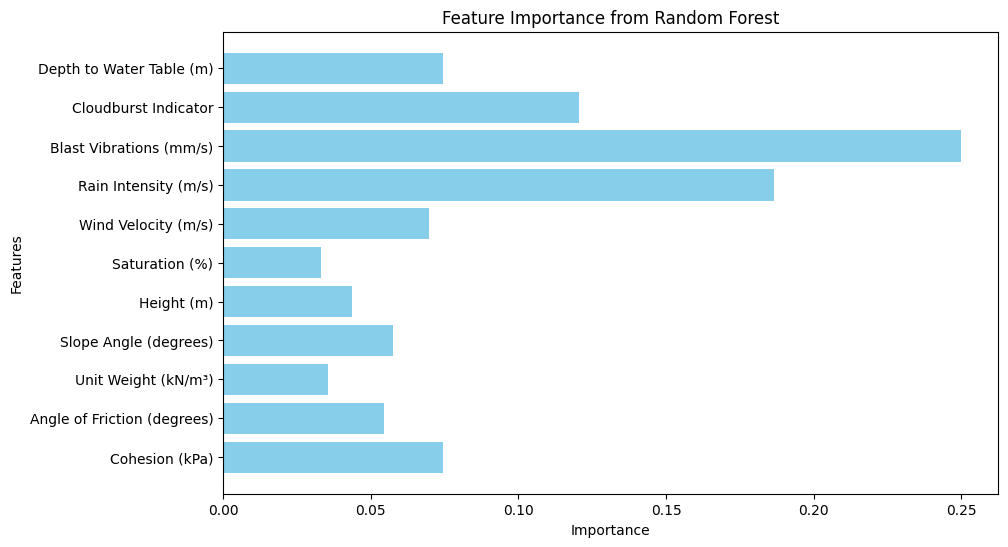

In [78]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()